# Actual TensorFlow Intro
TensorFlow is a deep learning library, developed by Google, that allows us to fairly complicated models with little coding

1. Data
2. Model
3. Objective function
4. Optimization algorithm

## Import the relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

C:\Users\serch\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

# Generate our input
generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

# Generate our target
generated_targets = 2*xs - 3*zs + 5 + noise


# np.savez(file name, array) save n-dimensional arrays in .npz format using a certain keryword(label) for each array
np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

## Solving with TensorFlow

In [3]:
# Loading Data
training_data = np.load('TF_intro.npz')

In [4]:
# Measure the size of the input and outputs
input_size = 2
output_size = 1

# tf.keras.Sequential() function that specifies how the model will be laid down('stacks layers')
model = tf.keras.Sequential([
    
    # tf.keras.layers.Dense(output size) takes the inputs to the model and calculate the dot product of the inputs and the weight and adds the bias
    # tf.keras.layers.Dense(output size, kernel_initializer, bias_initializer) fuction that is laying down the model (used to 'stack layers') and initialize weights
    tf.keras.layers.Dense(output_size,
                         kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                         bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
                         )
])

# tf.keras.optimizer.SGD(learning_rate) Stochastic gradient descent optimizer, including support for learning rate, momentum, decay, etc.
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

# model.compile(optimizer, loss) configure the model for training
model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

# Which data to fit
# model.fit(input, targets) fits(trains) the model
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)


Epoch 1/100

32/32 - 0s - loss: 23.0532 - 302ms/epoch - 9ms/step
Epoch 2/100
32/32 - 0s - loss: 1.2540 - 23ms/epoch - 723us/step
Epoch 3/100
32/32 - 0s - loss: 0.4134 - 22ms/epoch - 678us/step
Epoch 4/100
32/32 - 0s - loss: 0.3793 - 22ms/epoch - 694us/step
Epoch 5/100
32/32 - 0s - loss: 0.3914 - 23ms/epoch - 708us/step
Epoch 6/100
32/32 - 0s - loss: 0.3747 - 22ms/epoch - 681us/step
Epoch 7/100
32/32 - 0s - loss: 0.3703 - 22ms/epoch - 694us/step
Epoch 8/100
32/32 - 0s - loss: 0.3862 - 22ms/epoch - 691us/step
Epoch 9/100
32/32 - 0s - loss: 0.3639 - 22ms/epoch - 687us/step
Epoch 10/100
32/32 - 0s - loss: 0.4136 - 21ms/epoch - 668us/step
Epoch 11/100
32/32 - 0s - loss: 0.3687 - 22ms/epoch - 679us/step
Epoch 12/100
32/32 - 0s - loss: 0.3945 - 23ms/epoch - 720us/step
Epoch 13/100
32/32 - 0s - loss: 0.3665 - 24ms/epoch - 740us/step
Epoch 14/100
32/32 - 0s - loss: 0.3810 - 23ms/epoch - 725us/step
Epoch 15/100
32/32 - 0s - loss: 0.3781 - 27ms/epoch - 856us/step
Epoch 16/100
32/32 - 0s - loss: 

## Extract the weight and bias

In [5]:
model.layers[0].get_weights()

[array([[ 1.9976542],
        [-3.0054398]], dtype=float32),
 array([4.9953256], dtype=float32)]

In [6]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 1.9976542],
       [-3.0054398]], dtype=float32)

In [7]:
bias = model.layers[0].get_weights()[1]
bias

array([4.9953256], dtype=float32)

## Extract the ouputs(make predictions)

In [8]:
# model.predict_on_batch(data) calculates the output given inputs
model.predict_on_batch(training_data['inputs']).round(1)

array([[-17.6],
       [ 31.5],
       [ 41. ],
       [ 28.1],
       [  1.7],
       [ 31.4],
       [ -7.8],
       [ 11.7],
       [ 17.9],
       [ 14.5],
       [ 51.9],
       [ 21.8],
       [ 44.8],
       [ 17.7],
       [  2.4],
       [ 33.4],
       [-10.7],
       [ 14.1],
       [  2.6],
       [-31. ],
       [  5.2],
       [-11.6],
       [ 38.5],
       [ 12.9],
       [  4.5],
       [  4.2],
       [ 27.5],
       [ -1.5],
       [  5.9],
       [ 33.1],
       [-15.6],
       [ 26.3],
       [-22.5],
       [ -2.8],
       [-10.6],
       [ 30. ],
       [ 23.2],
       [ 29.9],
       [ 14.1],
       [-20.2],
       [ 14.4],
       [ 38.9],
       [-30.2],
       [-17. ],
       [-17.2],
       [-24.1],
       [ 13.3],
       [  0.9],
       [ 16.5],
       [ 13.9],
       [-27. ],
       [  0.7],
       [-38.4],
       [-24.9],
       [ 19.2],
       [ 45.3],
       [ 14.5],
       [-17.2],
       [ 31.8],
       [ 38.1],
       [-40. ],
       [  5.4],
       [

In [9]:
# Split targets and round to 1 digit
training_data['targets'].round(1)

array([[-17. ],
       [ 31.6],
       [ 40.7],
       [ 28.6],
       [  0.9],
       [ 31.1],
       [ -7.6],
       [ 12.6],
       [ 17.4],
       [ 15. ],
       [ 51.3],
       [ 22.7],
       [ 43.9],
       [ 17.8],
       [  3. ],
       [ 32.6],
       [ -9.7],
       [ 13.9],
       [  1.9],
       [-31. ],
       [  4.8],
       [-11.3],
       [ 39.3],
       [ 12. ],
       [  4.6],
       [  4. ],
       [ 27.7],
       [ -1.2],
       [  6.4],
       [ 33. ],
       [-15. ],
       [ 27. ],
       [-22.9],
       [ -2.4],
       [-10.6],
       [ 30.9],
       [ 24.2],
       [ 28.9],
       [ 15. ],
       [-20.8],
       [ 13.4],
       [ 39.2],
       [-30.1],
       [-16.9],
       [-16.2],
       [-23.3],
       [ 14.2],
       [  0.8],
       [ 15.5],
       [ 13.9],
       [-26.5],
       [  1.5],
       [-37.9],
       [-25.5],
       [ 19.9],
       [ 45.2],
       [ 13.7],
       [-18. ],
       [ 32.5],
       [ 37.3],
       [-39.3],
       [  5.7],
       [

## Plotting the data

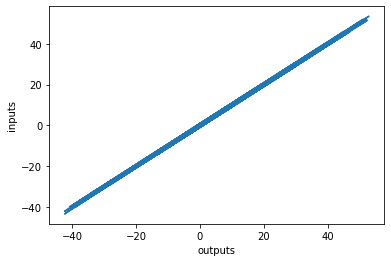

In [10]:
# Creating graph
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))

# Label
plt.xlabel('outputs')
plt.ylabel('inputs')

plt.show()